# Trabajo Final Inteligencia Artificial I - año 2018: Visión Artificial
---

# Dependencias
---

In [47]:
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

from skimage import io, color, img_as_float, img_as_ubyte, filters
import os

# Importar base de datos
---

In [45]:
banana = io.ImageCollection('./data/banana/*.png:./data/banana/*.jpg')
orange = io.ImageCollection('./data/orange/*.png:./data/orange/*.jpg')
lemon = io.ImageCollection('./data/lemon/*.png:./data/lemon/*.jpg')

## Bananas

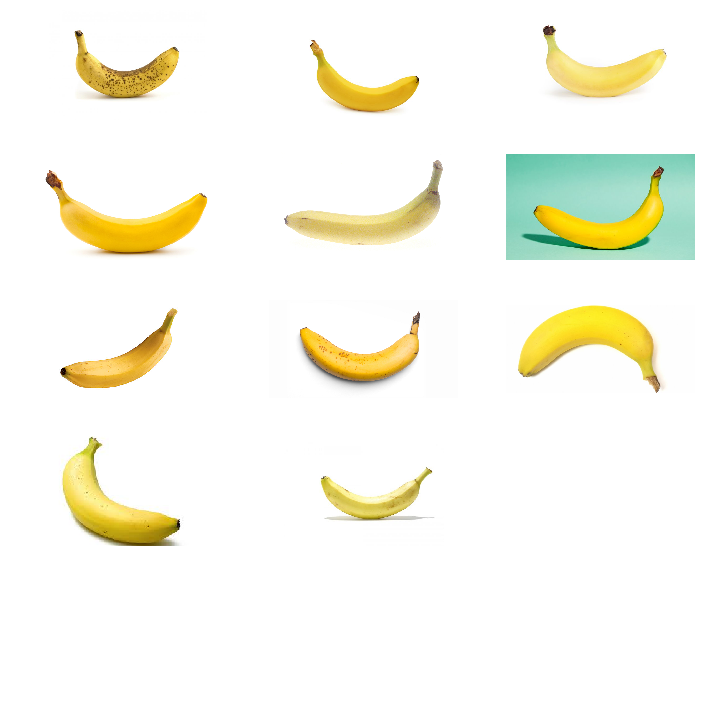

In [52]:
f, axes = plt.subplots(nrows=len(ic) // 3 + 1, ncols=3, figsize=(10, 10))

axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(banana):
    axes[i].imshow(image, cmap='gray')
    
plt.tight_layout()

## Naranjas

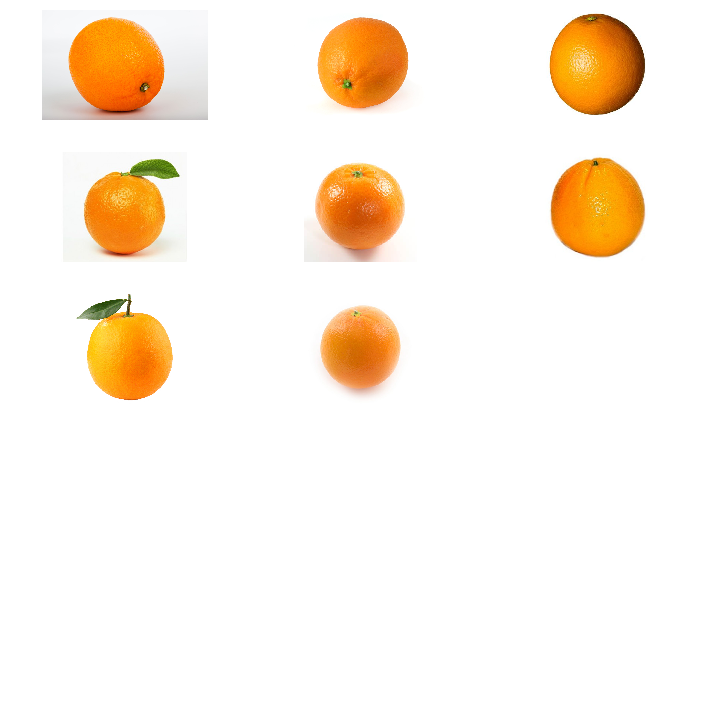

In [53]:
f, axes = plt.subplots(nrows=len(ic) // 3 + 1, ncols=3, figsize=(10, 10))

axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(orange):
    axes[i].imshow(image, cmap='gray')
    
plt.tight_layout()

## Limones

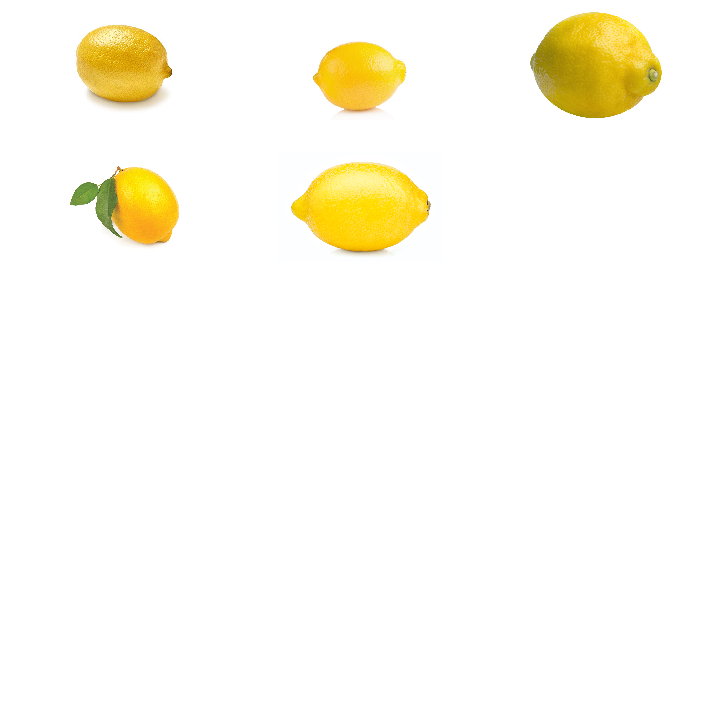

In [51]:
f, axes = plt.subplots(nrows=len(ic) // 3 + 1, ncols=3, figsize=(10, 10))

# subplots returns the figure and an array of axes
# we use `axes.ravel()` to turn these into a list
axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(lemon):
    axes[i].imshow(image, cmap='gray')
    #axes[i].set_title(os.path.basename(ic.files[i]))
    
plt.tight_layout()

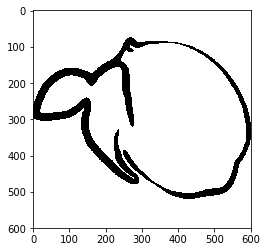

In [41]:
img_float = img_as_float(lemon[4])
img = color.rgb2gray(img_float)
bg = filters.gaussian(img, sigma=7)
bc = filters.sobel(bg)

th = filters.threshold_otsu(bc)
bf = bc < th

f, ax = plt.subplots()

ax.imshow(bf)